# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [20]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [3]:
# Memasukkan dataset Titanic
df = pd.read_csv('https://drive.google.com/uc?id=12WVAz0zyIUkPOsiukf3gCjm1GEtKhrVy')

# Menampilkan dataset
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
# Mengecek informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Cek statistik deskriptif dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Cek jumlah kolom ber tipe data numerik
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(f"Jumlah kolom numerik: {len(numerical_cols)}")

# Tampilkan nama kolom numerik beserta tipe datanya
print("Nama kolom numerik dan tipe datanya:")
print(df[numerical_cols].dtypes)

Jumlah kolom numerik: 7
Nama kolom numerik dan tipe datanya:
PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
dtype: object


In [7]:
# Cek jumlah kolom ber tipe data kategoric
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"Jumlah kolom kategorik: {len(categorical_cols)}")

# Menampilkan nama kolom tipe data kategorik
print("Nama kolom kategorik dan tipe datanya:")
print(df[categorical_cols].dtypes)

Jumlah kolom kategorik: 5
Nama kolom kategorik dan tipe datanya:
Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object


In [8]:
# Cek nilai unique data kategorik
for col in categorical_cols:
    if col != 'Name': # nama itu unik
        print(f"Nilai unique pada kolom '{col}':")
        print(df[col].unique())
        print()

Nilai unique pada kolom 'Sex':
['male' 'female']

Nilai unique pada kolom 'Ticket':
['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450' '330877'
 '17463' '349909' '347742' '237736' 'PP 9549' '113783' 'A/5. 2151'
 '347082' '350406' '248706' '382652' '244373' '345763' '2649' '239865'
 '248698' '330923' '113788' '347077' '2631' '19950' '330959' '349216'
 'PC 17601' 'PC 17569' '335677' 'C.A. 24579' 'PC 17604' '113789' '2677'
 'A./5. 2152' '345764' '2651' '7546' '11668' '349253' 'SC/Paris 2123'
 '330958' 'S.C./A.4. 23567' '370371' '14311' '2662' '349237' '3101295'
 'A/4. 39886' 'PC 17572' '2926' '113509' '19947' 'C.A. 31026' '2697'
 'C.A. 34651' 'CA 2144' '2669' '113572' '36973' '347088' 'PC 17605' '2661'
 'C.A. 29395' 'S.P. 3464' '3101281' '315151' 'C.A. 33111' 'S.O.C. 14879'
 '2680' '1601' '348123' '349208' '374746' '248738' '364516' '345767'
 '345779' '330932' '113059' 'SO/C 14885' '3101278' 'W./C. 6608'
 'SOTON/OQ 392086' '343275' '343276' '347466' 'W.E.P. 5734' 'C.A. 2315'
 '3

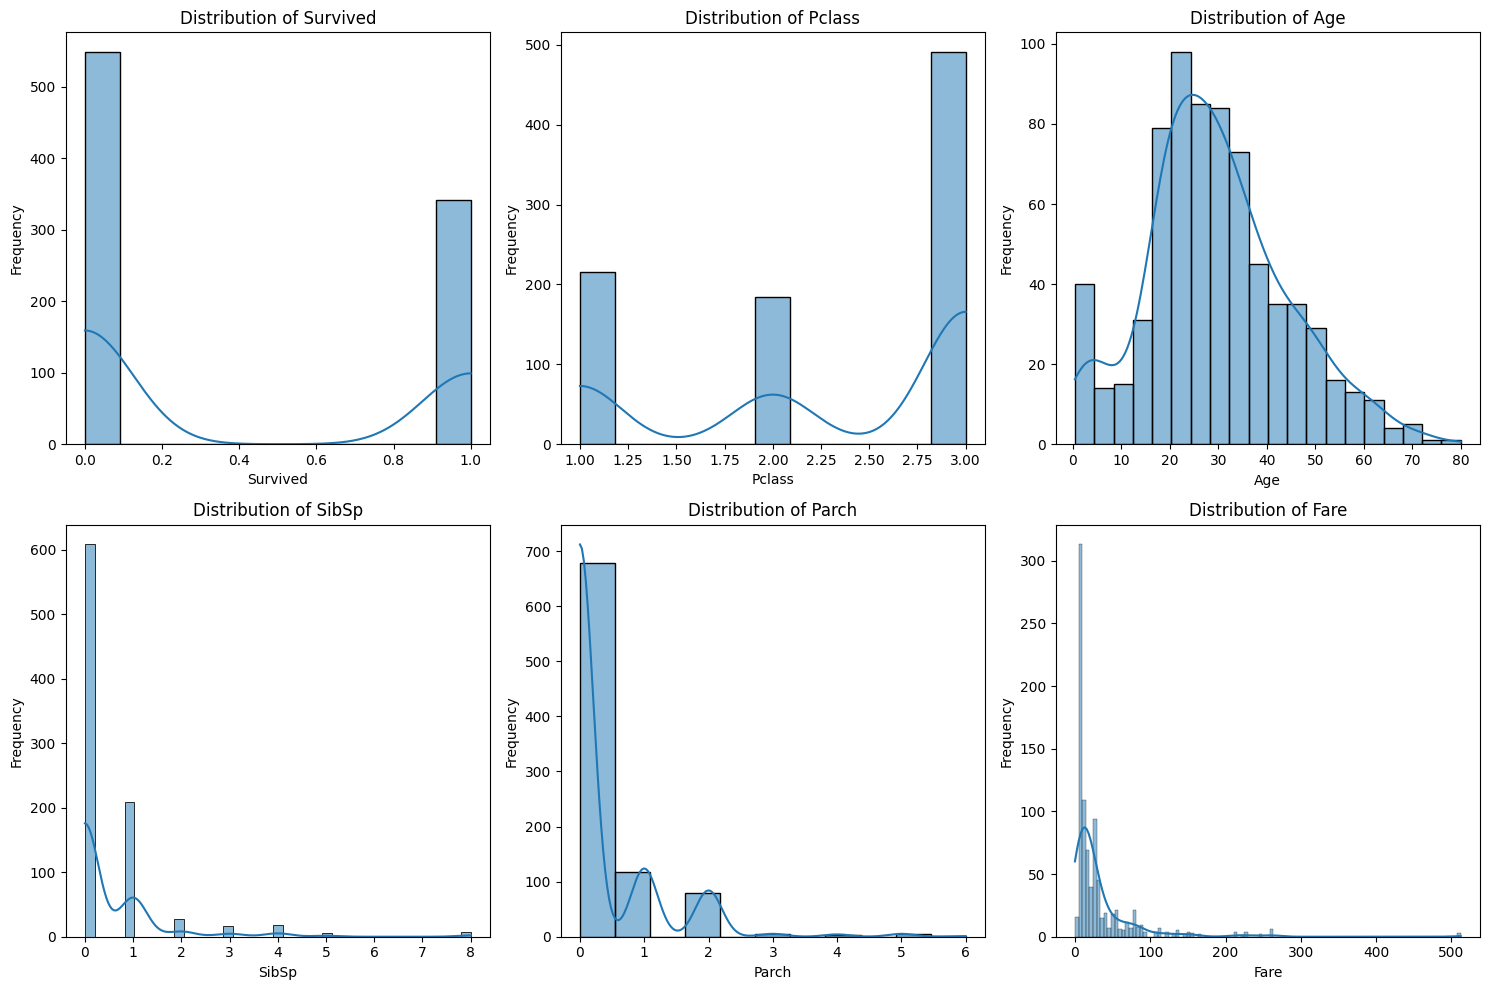

In [24]:
# Cek distribusi data numerik pada dataset dengan histogram
# Logika pengecualian PassengerId
if 'PassengerId' in numerical_cols:
    numerical_cols = numerical_cols.drop('PassengerId')

n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(data=df, x=col, ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

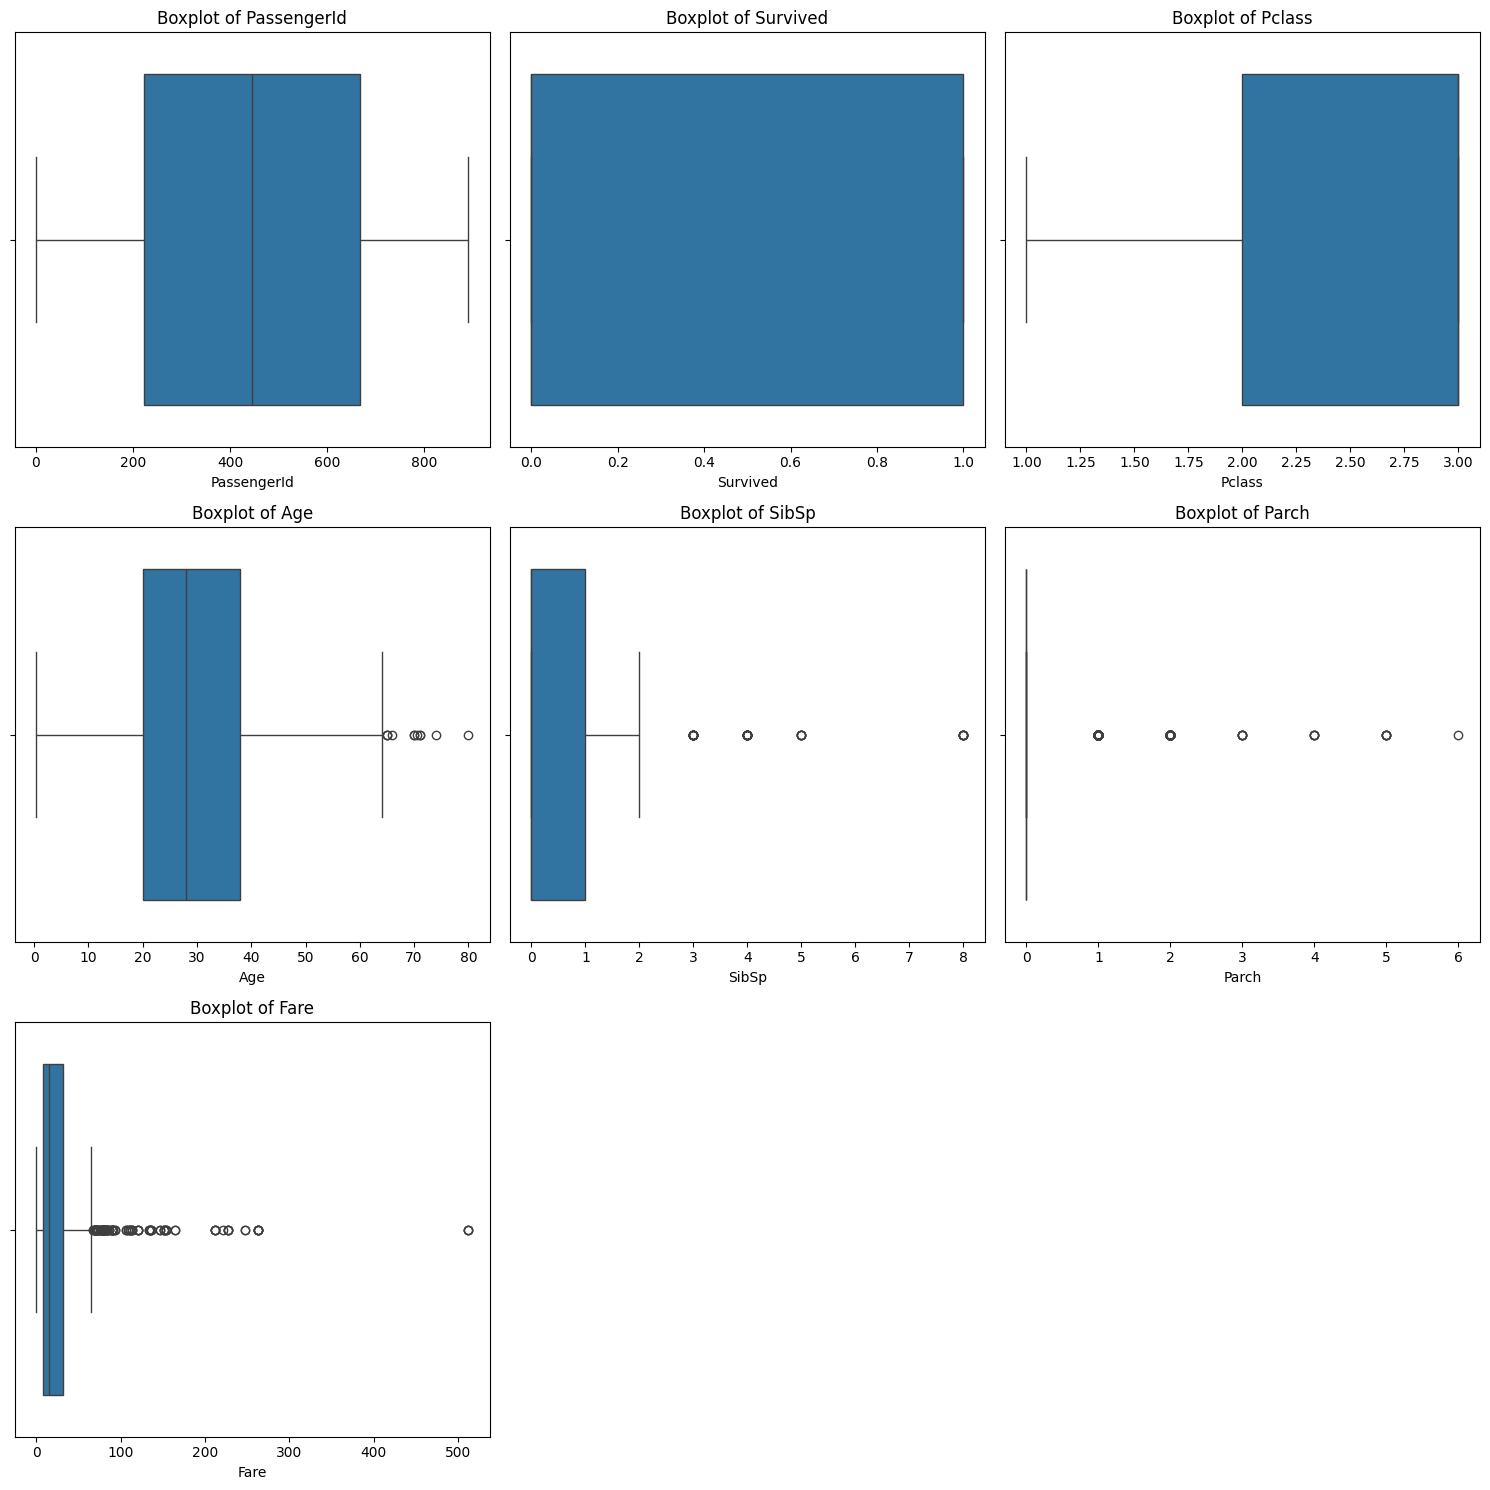

In [9]:
# Cek distribusi data numerik pada dataset dengan boxplot
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

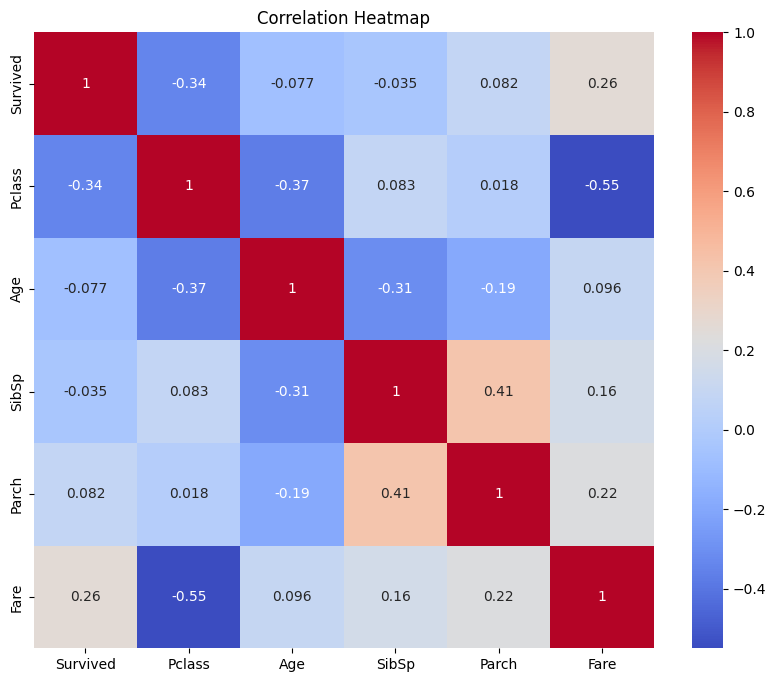

In [10]:
# Cek korelasi antar data numerik dengan heatmap
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=np.number)
numeric_df = numeric_df.drop('PassengerId', axis=1)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

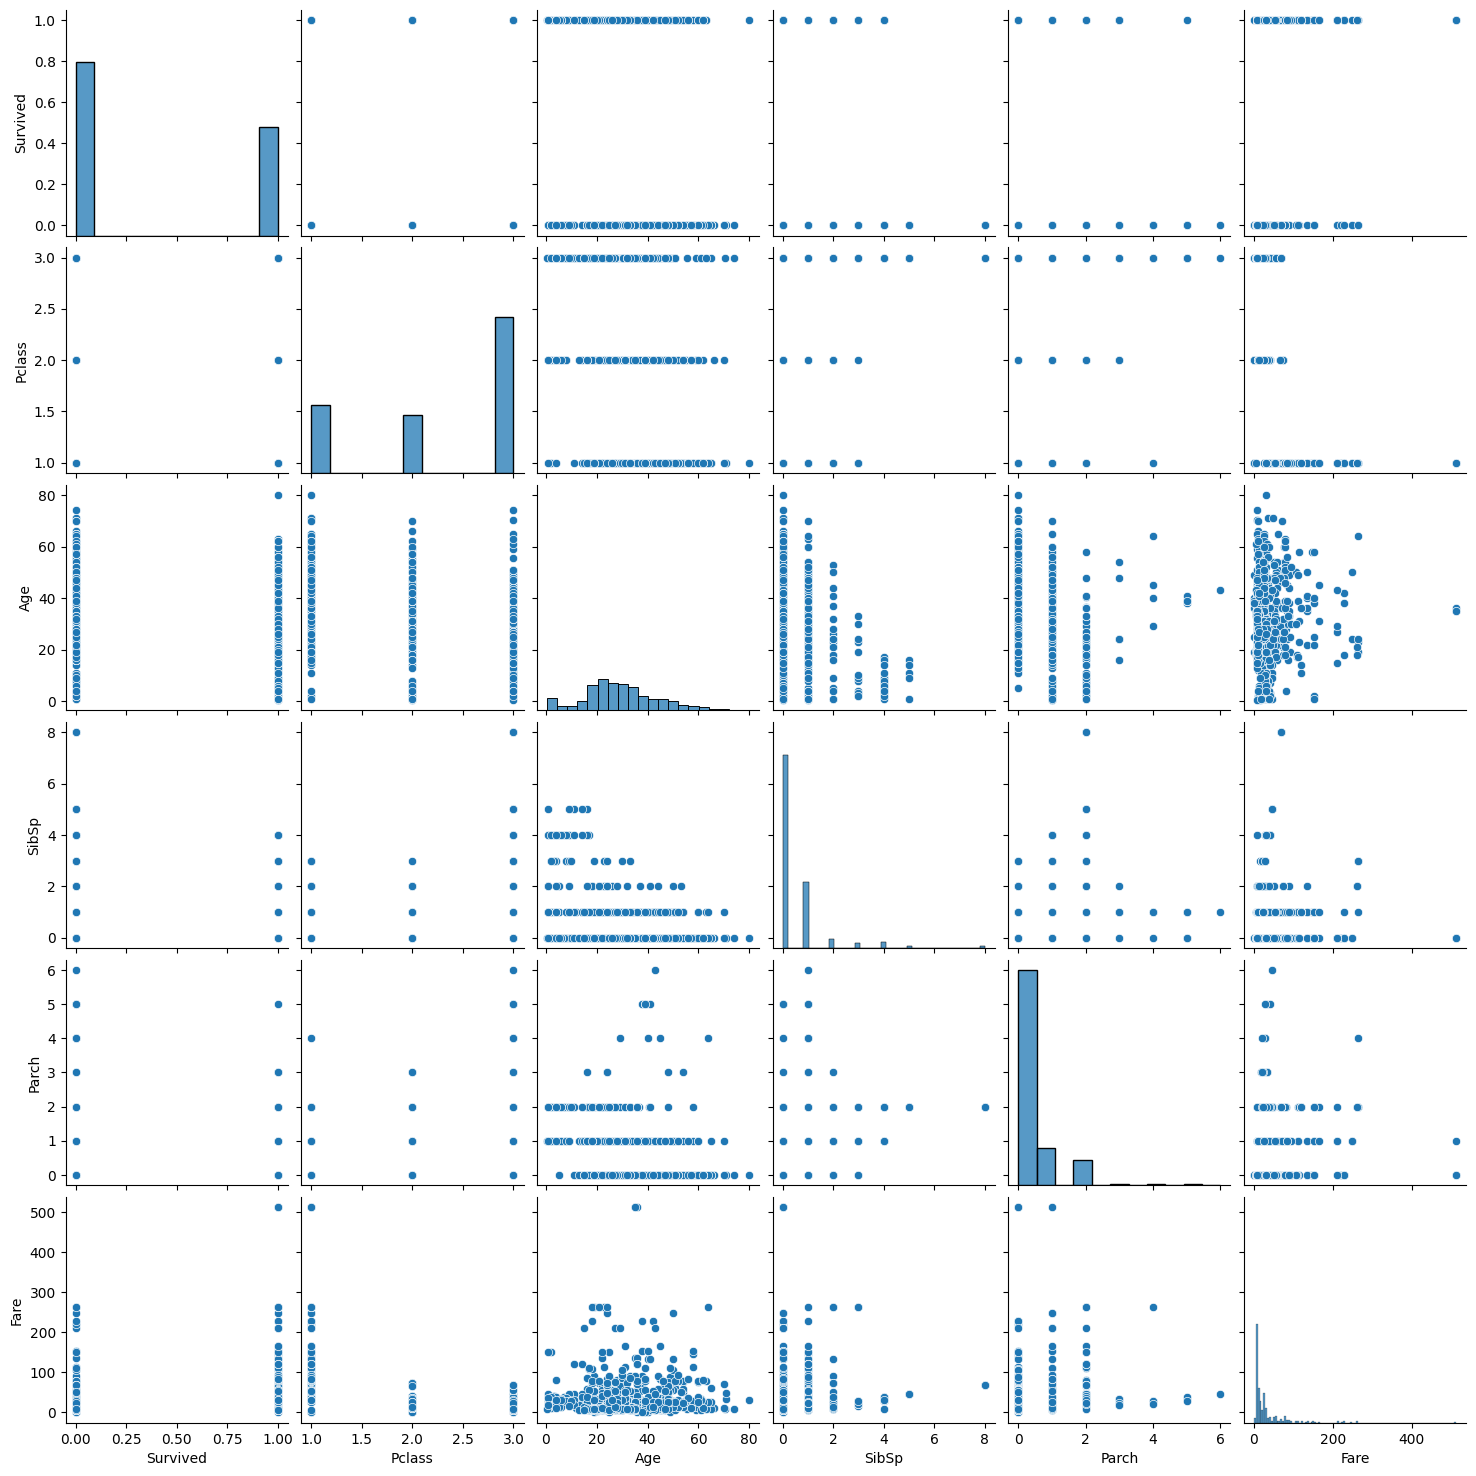

In [11]:
# Cek korelasi antar data numerik dengan pairplot
sns.pairplot(numeric_df)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [14]:
# Mengecek nilai Null
null_counts = df.isnull().sum()
null_cols = null_counts[null_counts > 0]

print("Kolom dengan nilai Null dan tipe datanya:")
for col in null_cols.index:
    print(f"{col}: {df[col].dtype} - {null_cols[col]}")

Kolom dengan nilai Null dan tipe datanya:
Age: float64 - 177
Cabin: object - 687
Embarked: object - 2


In [15]:
# Fungsi untuk mengatasi missing value
def handle_missing_values(df):
    """
    Fungsi untuk menangani missing values spesifik untuk dataset Titanic.

    Strategi Update:
    1. Age: Diisi dengan Median.
    2. Embarked: Diisi dengan Modus.
    3. Cabin: DIUBAH menjadi fitur 'HasCabin' (1 jika ada, 0 jika kosong),
       lalu kolom asli 'Cabin' dihapus.
    """
    df = df.copy()
    print("Memulai Handling Missing Values...")

    # Input missing value kolom Age dengan Median
    # karena terdapat outlier dan distribusi sedikit ada kemiringan
    if 'Age' in df.columns:
        median_age = df['Age'].median()
        df['Age'] = df['Age'].fillna(median_age)
        print(f"Kolom 'Age' diisi dengan median: {median_age}")

    # Input missing value kolom Embarked dengan Mode/Modus
    if 'Embarked' in df.columns:
        mode_embarked = df['Embarked'].mode()[0]
        df['Embarked'] = df['Embarked'].fillna(mode_embarked)
        print(f"Kolom 'Embarked' diisi dengan modus: {mode_embarked}")

    # Mengatasi missing value pada kolom Cabin
    # dengan membuat Kolom hasCabin
    if 'Cabin' in df.columns:
        # Buat kolom baru (isi 1 jika Cabin ada isinya, 0 jika NaN)
        df['hasCabin'] = df['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)
        print("Fitur baru 'hasCabin' berhasil dibuat.")

        # Hapus kolom asli Cabin karena sudah diwakili HasCabin
        df = df.drop(columns=['Cabin'])
        print("Kolom asli 'Cabin' dihapus.")

    # Bersihkan sisa-sisa missing value jika ada
    if df.isnull().sum().sum() > 0:
        print("Masih ada sisa missing values drop rows...")
        df.dropna(inplace=True)

    print("Selesai Handling Missing Values.\n")
    return df

In [17]:
# Fungsi untuk melakukan teknik rekayasa fitur (feature engineering)
def feature_engineering(df):
    """
    Fungsi untuk melakukan Feature Engineering dan Feature Selection.

    Langkah-langkah:
    1. Extract Title: Mengambil gelar (Mr, Mrs, dll) dari kolom Name.
    2. FamilySize: Menggabungkan SibSp dan Parch.
    3. Drop Columns: Menghapus kolom yang tidak lagi relevan atau redundan.
    """
    df = df.copy()
    print("Memulai Feature Engineering...")

    # Membuat Fitur 'Title' dari kolom 'Name'
    if 'Name' in df.columns:
        # Menggunakan RegEx untuk mengambil kata yang diakhiri titik (.)
        # Contoh: "Braund, Mr. Owen Harris", diambil "Mr"
        df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

        # Mengelompokkan gelar-gelar langka agar model tidak rancu
        title_mapping = {
            'Mr': 'Mr',
            'Miss': 'Miss', 'Mlle': 'Miss', 'Ms': 'Miss', # Penyeragaman Miss
            'Mrs': 'Mrs', 'Mme': 'Mrs',                   # Penyeragaman Mrs
            'Master': 'Master',
            # Gelar bangsawan/profesi langka digabung jadi 'Rare'
            'Dr': 'Rare', 'Rev': 'Rare', 'Col': 'Rare', 'Major': 'Rare',
            'Lady': 'Rare', 'Countess': 'Rare', 'Jonkheer': 'Rare',
            'Don': 'Rare', 'Dona': 'Rare', 'Capt': 'Rare', 'Sir': 'Rare'
        }

        df['Title'] = df['Title'].map(title_mapping)

        # Isi dengan 'Rare' jika ada gelar yang tidak terdaftar di mapping
        df['Title'] = df['Title'].fillna('Rare')
        print("Fitur 'Title' berhasil diekstrak dan dikelompokkan.")

    # Membuat Fitur 'FamilySize' berdasarkan kolom SibSp dan Parch
    # Logic: Saudara/Pasangan + Orangtua/Anak + Diri Sendiri atau 1
    if 'SibSp' in df.columns and 'Parch' in df.columns:
        df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
        print("Fitur 'FamilySize' berhasil dibuat.")

    # Feature Selection (Drop Kolom)
    # Kolom yang akan dibuang:
    # - PassengerId: Hanya index urut, tidak ada pola.
    # - Name: Sudah diambil melalui 'Title'.
    # - Ticket: Terlalu acak/unik, susah ditarik polanya.
    cols_to_drop = ['PassengerId', 'Name', 'Ticket']

    # Cek dulu apakah kolomnya ada sebelum di-drop (biar tidak error saat re-run)
    existing_cols_to_drop = [c for c in cols_to_drop if c in df.columns]

    if existing_cols_to_drop:
        df = df.drop(columns=existing_cols_to_drop)
        print(f"Kolom tidak relevan dihapus: {existing_cols_to_drop}")

    print("Selesai Feature Engineering.\n")
    return df

In [19]:
# Fungsi untuk melakukan feature encoding
def encoding(df):
    """
    Fungsi untuk mengubah data kategori (Teks) menjadi Angka.

    Target Kolom:
    - Sex (male, female) -> 0, 1
    - Embarked (S, C, Q) -> 0, 1, 2
    - Title (Mr, Mrs, dll) -> 0, 1, 2, ...
    """
    df = df.copy()
    print("Memulai Encoding Data...")

    # Ambil semua kolom yang tipe datanya 'object' (Teks)
    # Ini otomatis akan mengambil Sex, Embarked, dan Title
    cat_cols = df.select_dtypes(include=['object']).columns

    print(f"Kolom kategori ditemukan: {list(cat_cols)}")

    for col in cat_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        print(f"Kolom '{col}' berhasil di-encode.")

    print("Selesai Encoding.\n")
    return df

In [21]:
# Fungsi untuk melakukan feature scaling
def scaling(df):
    """
    Fungsi untuk melakukan penyekalaan (Scaling) pada fitur numerik.

    Teknik:
    1. Log Transformation: Khusus untuk 'Fare' yang skewed (miring).
       Menggunakan np.log1p (log(1+x)) agar tidak error jika ada nilai 0.
    2. StandardScaler: Mengubah distribusi menjadi Mean=0, Std=1.

    Target Kolom: Age, Fare
    """
    df = df.copy()
    print("Memulai Scaling Data...")

    # Melakukan Log Transform untuk 'Fare'
    # Ini akan mengubah grafik yang miring tajam menjadi lebih seperti lonceng (normal)
    if 'Fare' in df.columns:
        # Menggunakan log1p (log(1+x)) karena Fare ada yang nilainya 0
        df['Fare'] = np.log1p(df['Fare'])
        print("Log transformation diterapkan pada 'Fare' (mengatasi skewness).")

    # Melakukan Standard Scaling
    # Target kolom numerik
    num_cols = ['Age', 'Fare']

    # Cek apakah kolomnya ada di df
    valid_cols = [c for c in num_cols if c in df.columns]

    if valid_cols:
        scaler = StandardScaler()
        df[valid_cols] = scaler.fit_transform(df[valid_cols])
        print(f"StandardScaler berhasil diterapkan pada: {valid_cols}")

    print("Selesai Scaling.\n")
    return df

In [22]:
# Memanggil fungsi Handling Missing Values
df_clean = handle_missing_values(df)
print("Cek Missing Values setelah handling:")
print(df_clean.isnull().sum())

Memulai Handling Missing Values...
Kolom 'Age' diisi dengan median: 28.0
Kolom 'Embarked' diisi dengan modus: S
Fitur baru 'hasCabin' berhasil dibuat.
Kolom asli 'Cabin' dihapus.
Selesai Handling Missing Values.

Cek Missing Values setelah handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
hasCabin       0
dtype: int64


In [23]:
# Memanggil fungsi Feature Engineering
df_fe = feature_engineering(df_clean)
df_fe.head()

Memulai Feature Engineering...
Fitur 'Title' berhasil diekstrak dan dikelompokkan.
Fitur 'FamilySize' berhasil dibuat.
Kolom tidak relevan dihapus: ['PassengerId', 'Name', 'Ticket']
Selesai Feature Engineering.



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,hasCabin,Title,FamilySize
0,0,3,male,22.0,1,0,7.2500,S,0,Mr,2
1,1,1,female,38.0,1,0,71.2833,C,1,Mrs,2
2,1,3,female,26.0,0,0,7.9250,S,0,Miss,1
3,1,1,female,35.0,1,0,53.1000,S,1,Mrs,2
4,0,3,male,35.0,0,0,8.0500,S,0,Mr,1


In [24]:
# Memanggil fungsi Feature Encoding
df_encoded = encoding(df_fe)
df_encoded.head()

Memulai Encoding Data...
Kolom kategori ditemukan: ['Sex', 'Embarked', 'Title']
Kolom 'Sex' berhasil di-encode.
Kolom 'Embarked' berhasil di-encode.
Kolom 'Title' berhasil di-encode.
Selesai Encoding.



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,hasCabin,Title,FamilySize
0,0,3,1,22.0,1,0,7.2500,2,0,2,2
1,1,1,0,38.0,1,0,71.2833,0,1,3,2
2,1,3,0,26.0,0,0,7.9250,2,0,1,1
3,1,1,0,35.0,1,0,53.1000,2,1,3,2
4,0,3,1,35.0,0,0,8.0500,2,0,2,1


In [25]:
# Memanggil fungsi Feature Scaling
df_scaled = scaling(df_encoded)
df_scaled.head()

Memulai Scaling Data...
Log transformation diterapkan pada 'Fare' (mengatasi skewness).
StandardScaler berhasil diterapkan pada: ['Age', 'Fare']
Selesai Scaling.



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,hasCabin,Title,FamilySize
0,0,3,1,-0.565736,1,0,-0.879741,2,0,2,2
1,1,1,0,0.663861,1,0,1.361220,0,1,3,2
2,1,3,0,-0.258337,0,0,-0.798540,2,0,1,1
3,1,1,0,0.433312,1,0,1.062038,2,1,3,2
4,0,3,1,0.433312,0,0,-0.784179,2,0,2,1


In [26]:
# Menampilkan dataset final
df_final = df_scaled.copy()
df_final

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,hasCabin,Title,FamilySize
0,0,3,1,-0.565736,1,0,-0.879741,2,0,2,2
1,1,1,0,0.663861,1,0,1.361220,0,1,3,2
2,1,3,0,-0.258337,0,0,-0.798540,2,0,1,1
3,1,1,0,0.433312,1,0,1.062038,2,1,3,2
4,0,3,1,0.433312,0,0,-0.784179,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,-0.181487,0,0,-0.333698,2,0,4,1
887,1,1,0,-0.796286,0,0,0.487082,2,1,1,1
888,0,3,0,-0.104637,1,2,0.242007,2,0,1,4
889,1,1,1,-0.258337,0,0,0.487082,0,1,2,1


In [27]:
# Menampilkan informasi dataset final
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked    891 non-null    int64  
 8   hasCabin    891 non-null    int64  
 9   Title       891 non-null    int64  
 10  FamilySize  891 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 76.7 KB


In [28]:
# Ekspor data final ke format csv
df_final.to_csv('titanic_preprocessing.csv', index=False)
print(f"Data hasil eksperimen berhasil disimpan!")

Data hasil eksperimen berhasil disimpan!
